<a href="https://colab.research.google.com/github/yaroslavtsepkov/colab/blob/lab_0/Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix multiplication
### CPU (numpy) VS GPU(cupy)


In [17]:
import numpy as np
import cupy as cp
import time
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
cp.cuda.Device()

<CUDA Device 0>

In [19]:
def genMatrix(n):
    return np.random.uniform(size=(n,n))

In [20]:
def cpuMult(n):
    size = []
    time_cpu = []
    while n < 2000:
        s = time.time()
        size.append(n)
        matrix = genMatrix(n)
        np.matmul(matrix, matrix)
        n += 50
        p = time.time()
        time_cpu.append(p-s)
    return size, time_cpu

In [21]:
def gpuMult(n):
    size = []
    time_gpu = []
    while n < 2000:
        s = time.time()
        size.append(n)
        matrix = cp.array(genMatrix(n))
        cp.matmul(matrix, matrix)
        n += 50
        p = time.time()
        time_gpu.append(p-s)
    return size, time_gpu

In [22]:
size_list_cpu, time_list_cpu = cpuMult(100)
size_list_gpu, time_list_gpu = gpuMult(100)
time_cpu = np.array(time_list_cpu)
time_gpu = np.array(time_list_gpu)

In [23]:
df = pd.DataFrame({
    'size_of_matrix': size_list_cpu,
    'time_for_CPU': time_cpu,
    'time_for_GPU': time_gpu,
    'boost': time_cpu / time_gpu
})
df

,size_of_matrix,time_for_CPU,time_for_GPU,boost
0,100,0.000514,0.000680,0.755524
1,150,0.000742,0.000538,1.378654
2,200,0.001873,0.001329,1.409148
3,250,0.005320,0.001641,3.241755
4,300,0.006530,0.001935,3.375647
5,350,0.005277,0.002447,2.156469
6,400,0.007046,0.003363,2.095073
7,450,0.009472,0.003930,2.410180
8,500,0.011139,0.004608,2.417572
9,550,0.014566,0.005690,2.559918


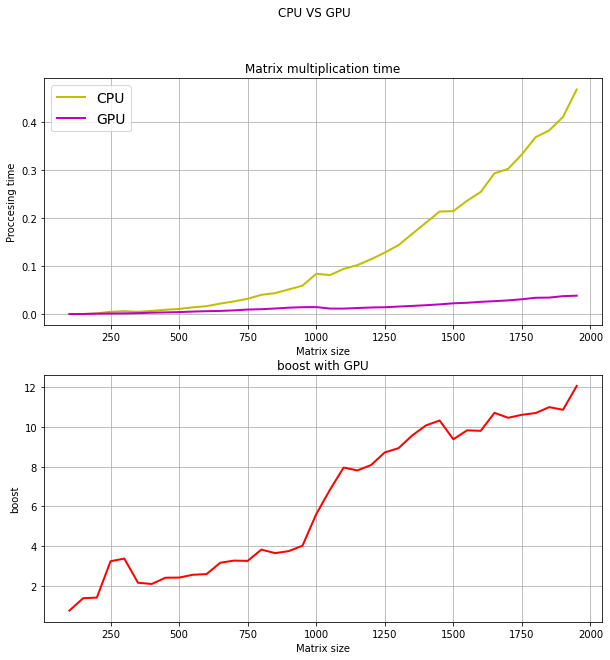

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
fig.suptitle('CPU VS GPU') 

ax1.plot(df.size_of_matrix, df.time_for_CPU, color='y', label = 'CPU', linewidth=2)
ax1.plot(df.size_of_matrix, df.time_for_GPU, color='m', label = 'GPU', linewidth=2)
ax1.legend(loc="upper left", fontsize=14)
ax1.set_xlabel('Matrix size')
ax1.set_ylabel('Proccesing time')
ax1.set_title('Matrix multiplication time')
ax1.grid()

ax2.plot(df.size_of_matrix, df.boost, color='r', linewidth=2)
ax2.set_xlabel('Matrix size')
ax2.set_ylabel('boost')
ax2.set_title('boost with GPU')
ax2.grid()

plt.show()